In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In models like below outliers impact much
# 1. Linear regression/ Logistic regression
# 2. Ensemble technique - Adaboost
# 3. Deep Learning algs

# COmmon patterns -> we calculate weights here

In [3]:
# In tree based algos outliers dont impact much

In [4]:
# # Treat Outliers
# 1. Trimming -> data will be lost, but its fast
# 2. Capping -> limiting the outlers and giving them the cutoff value and replace them
# 3. missing values like treatment -> nan etc
# 4. Discritization -> numerical data bracket them and treat them as same

In [5]:
## this sheet will mostl contain Trimming and capping

In [6]:
# mue +- 3sigma -> when data is close to normally distributed
#  q1 - 1.5 iqr , q3 + 1.5 iqr  -> skewed data -> box plot
# percentile based approach -> 0.5 or 2.5 and 97.5 or 99.5 percentile

In [7]:
# Techniques covered
# 1. Z - score treatement
# 2. IQR based filtering
# 3. Percentile
# 4. Winsorization

In [8]:
# Z- score -> assumpption -> the data is distributed normally, or close to normally distributed
# mean and 1 std deviation 68.2 % data lies mue +- sd
# mean and 2 std 95% data lies mue +- 2 sd
# mean and 3 std 97.5 data lies mue +- 3 sd

In [9]:
# Z- socre xi = (xi-mue) / sigma
#  Outlier treatment -> trimming and capping

In [10]:
from google.colab import files
uploaded = files.upload()

Saving placement.csv to placement.csv


In [11]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<ipython-input-12-b2b403341058>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-12-b2b403341058>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


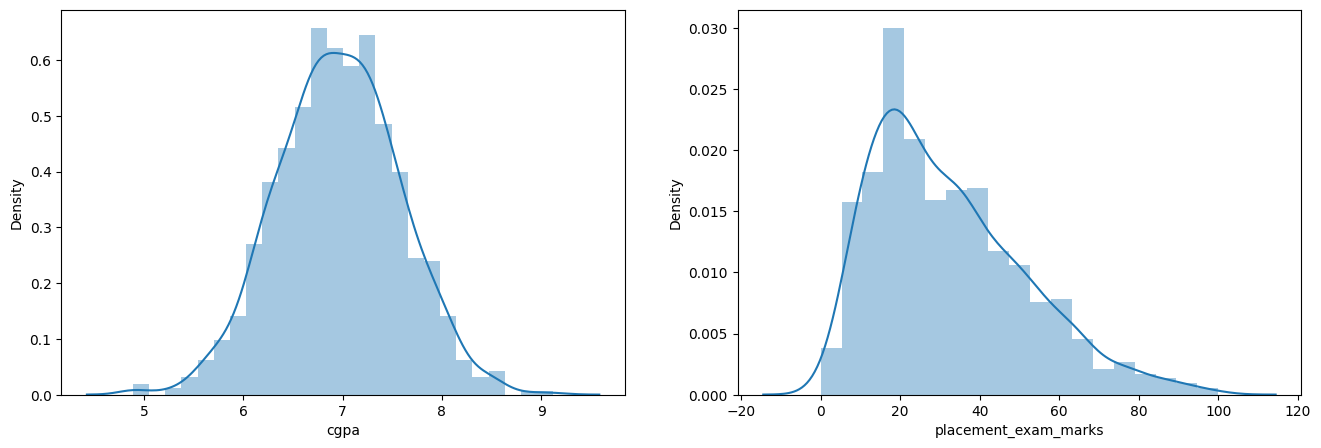

In [12]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

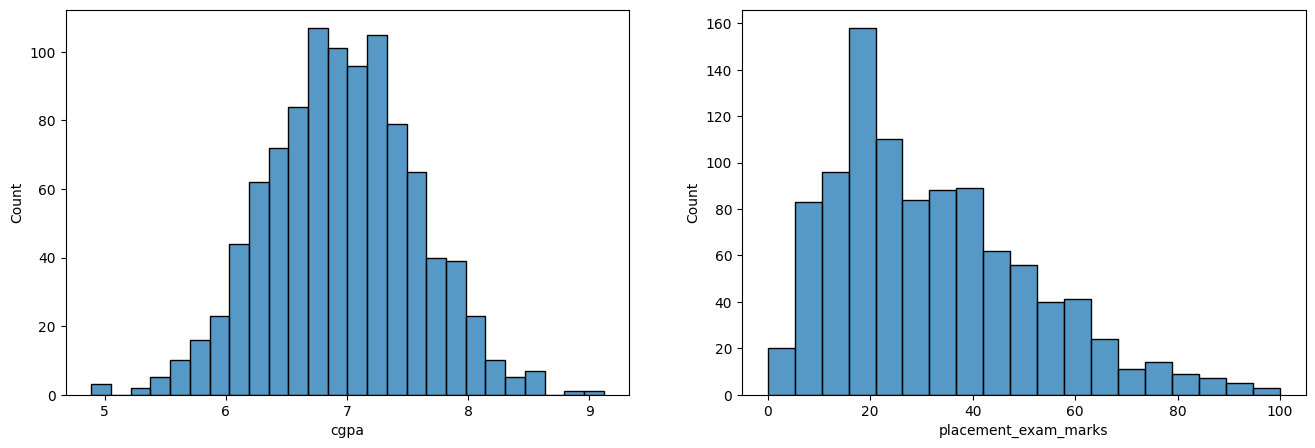

In [13]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

In [14]:
# observations -> Z score can be applied on cgpa as we can see a noral distributed pattern
# it cant be applied on placement_exam_marks column because this is skewed

In [15]:
print('mean', df['cgpa'].mean())
print("std",df['cgpa'].std())
print('min', df['cgpa'].min())
print('max', df['cgpa'].max())

mean 6.96124
std 0.6158978751323896
min 4.89
max 9.12


In [16]:
# finding boundary values
print('high tail', df['cgpa'].mean() + 3*df['cgpa'].std())
print('low tail', df['cgpa'].mean() - 3*df['cgpa'].std())

high tail 8.808933625397168
low tail 5.113546374602832


In [17]:
# finding outliers -> show me the rows that are falling at either end tails of the distribution
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [18]:
# trimming -< wrote a condition and created the new dataset

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)] # well opposite of what we wrote abive
new_df # the above 5 columns have ben removed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [19]:
# Approach 2
# Calculating Z-score

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/ df['cgpa'].std() # creating a new column of cgpa with z scores
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [20]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [21]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [22]:
df[(df['cgpa_zscore'] > 3) |(df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [23]:
# trimming

new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [24]:
# capping

In [25]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
print('upper', upper_limit)
print('lower', lower_limit)

upper 8.808933625397168
lower 5.113546374602832


In [26]:
df['cgpa'] = np.where(df['cgpa']> upper_limit, upper_limit, np.where( df['cgpa'] < lower_limit, lower_limit, df['cgpa']))

In [27]:
#  np.where(x,y,z) x = condition, y = if condition becomes true what to do, z = if conditoon becomes false what to do

In [28]:
df # we can see that the number of rows is same and nothing is deleated

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [29]:
df['cgpa'].describe() # look at min and max

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [30]:
####################################   part 2   ########################################

In [31]:
#  iqr and box plot -> used in sked distributed data

In [32]:
# know iqr proximity rule - The IQR proximity rule is particularly useful for skewed data where outliers might significantly affect the mean or standard deviation.
# The choice of the 1.5 multiplier is a trade-off between capturing more outliers (using a higher value) and reducing the risk of flagging non-outliers (using a lower value).

In [33]:
# The IQR proximity rule is a method used to identify outliers in a dataset based on the interquartile range (IQR). Here's how it works:

# 1. Calculate the IQR:

# Order your data set from least to greatest.
# Find the first quartile (Q1), which is the median of the lower half of the data.
# Find the third quartile (Q3), which is the median of the upper half of the data.
# Calculate the IQR by subtracting Q1 from Q3: IQR = Q3 - Q1.
# 2. Identify potential outliers:

# Multiply the IQR by 1.5 (this is a common threshold, but it can be adjusted).
# Subtract 1.5 x IQR from Q1. Any data point below this value is considered a potential outlier.
# Add 1.5 x IQR to Q3. Any data point above this value is considered a potential outlier.

In [34]:
# df = df.iloc[:,:3]
# df

In [35]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<ipython-input-36-b2b403341058>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-36-b2b403341058>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


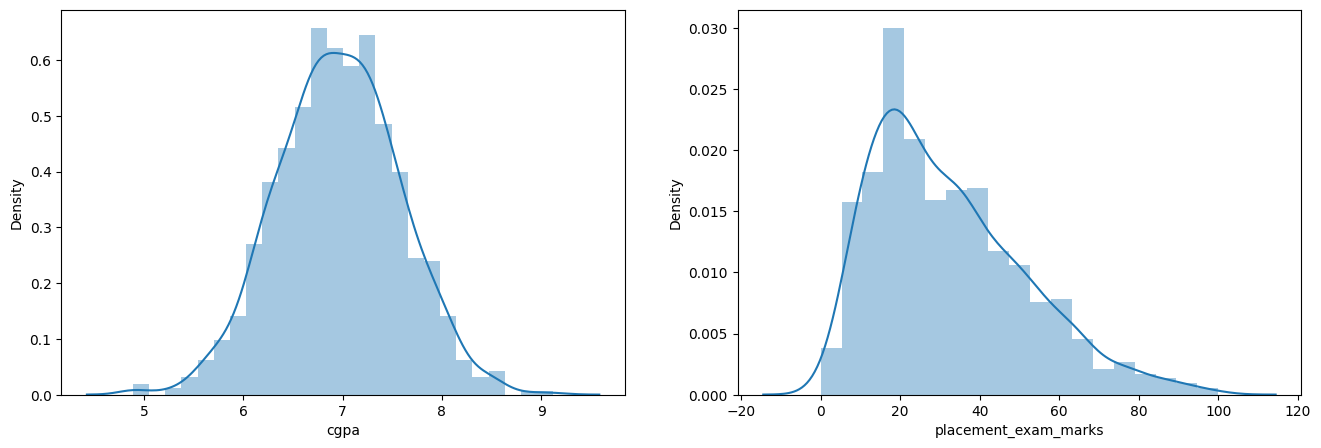

In [36]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [39]:
# rightly skewed
df['placement_exam_marks'].skew() , df['cgpa'].skew()

(0.8356419499466834, -0.014529938929314918)

In [38]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

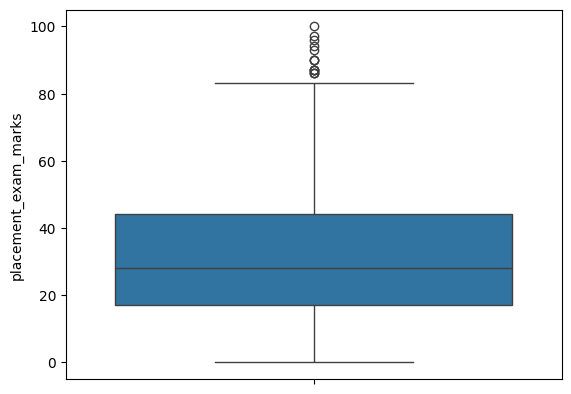

In [40]:
sns.boxplot(df['placement_exam_marks'])

In [41]:
# finding the IQR

perc25 = df['placement_exam_marks'].quantile(0.25)
perc75 = df['placement_exam_marks'].quantile(0.75)
perc25, perc75

(17.0, 44.0)

In [42]:
iqr = perc75 - perc25
iqr # 50%

27.0

In [43]:
upper_limit = perc75 +1.5 * iqr
lower_limit = perc25 -1.5 * iqr

print('upper : ', upper_limit)
print('lower : ', lower_limit)

upper :  84.5
lower :  -23.5


In [44]:
# finding outliers

In [45]:
df[df['placement_exam_marks'] > upper_limit ]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [46]:
df[df['placement_exam_marks'] < lower_limit ] # none as we dont have anyone below 0 but our lower limit was -23.5

,cgpa,placement_exam_marks,placed


In [ ]:
# trimming

In [47]:
new_df = df[df['placement_exam_marks'] < upper_limit ]
new_df # the above 15 rowns that had outliers for the exam got removed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
# comparing the old and new data

<ipython-input-48-5d407993317c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-48-5d407993317c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


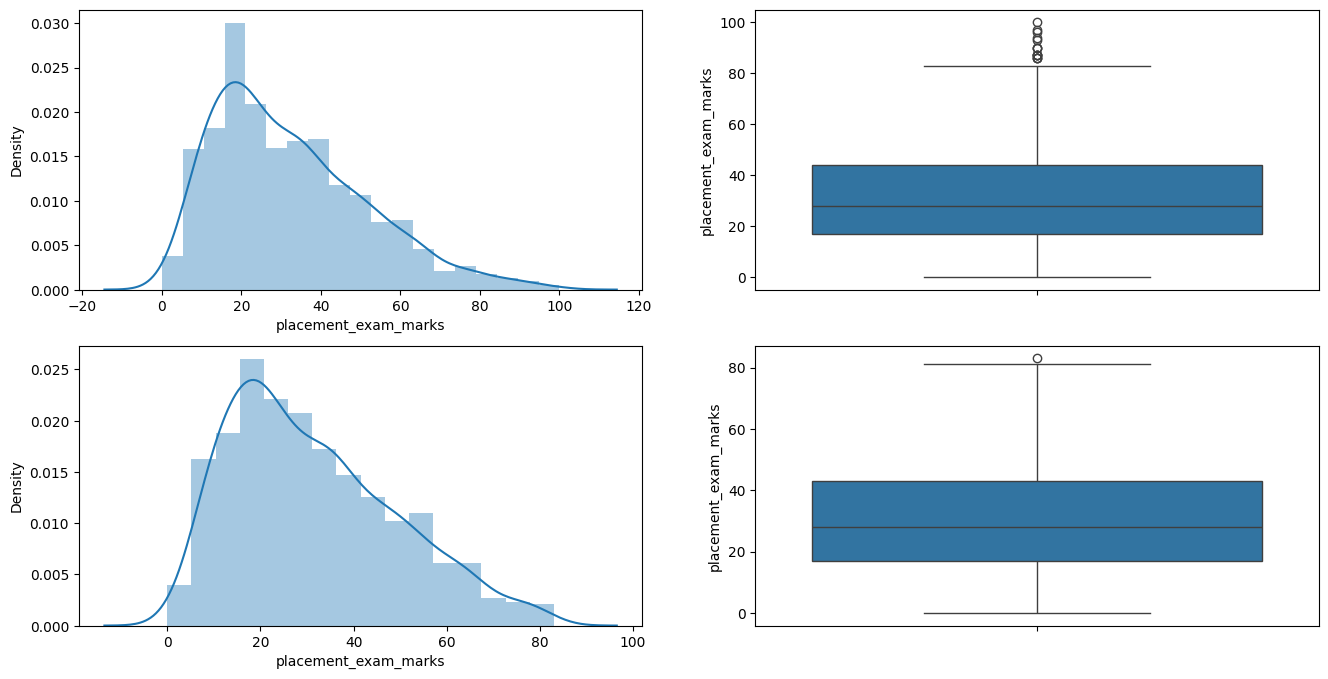

In [48]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [ ]:
# capping

In [49]:
new_df_cap = df.copy()

In [50]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit, upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit, lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [51]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
# np.where(condition, true, false)

<ipython-input-52-3d95d20d72d4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-52-3d95d20d72d4>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


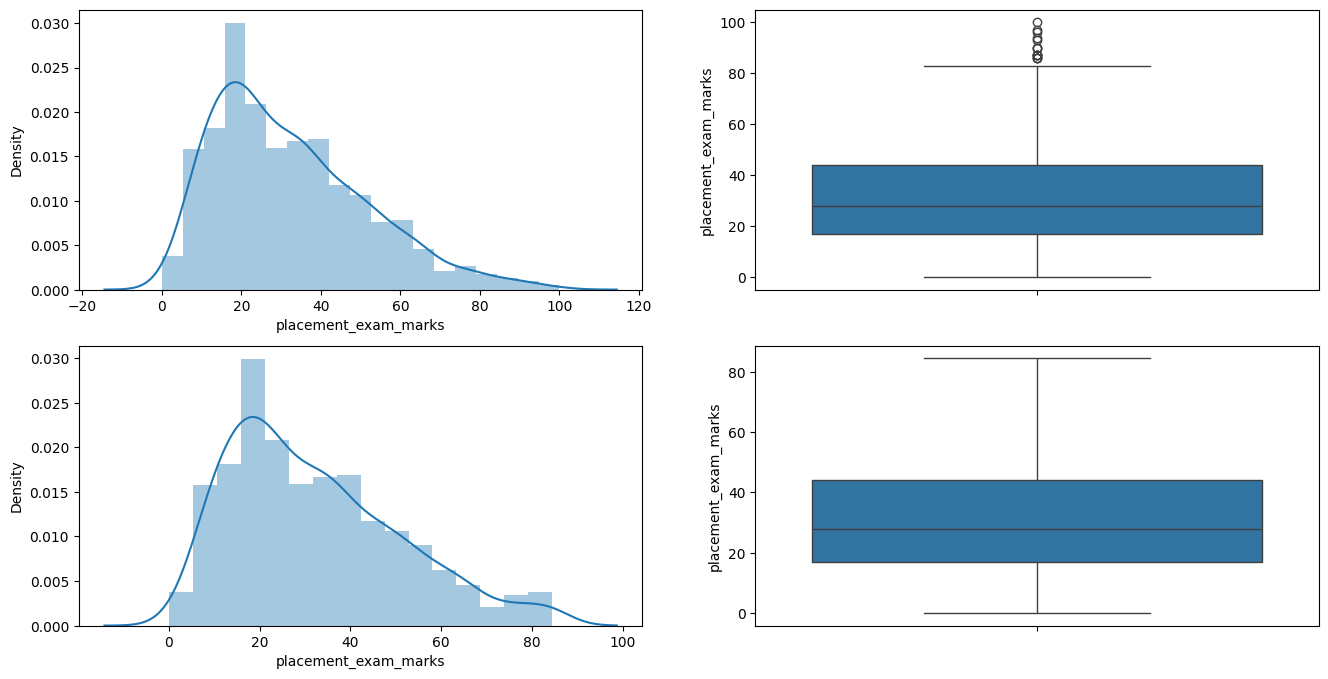

In [52]:
# comparing again

plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

In [53]:
################# part 3 - Winsorization #######################

In [54]:
# capping using the method of percentile is considered as winsorization

In [55]:
from google.colab import files

uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [56]:
df = pd.read_csv('weight-height.csv')
df

<Axes: >

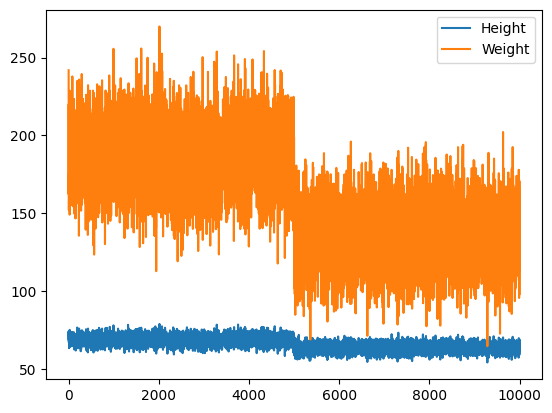

In [58]:
df.plot()

In [59]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<ipython-input-60-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

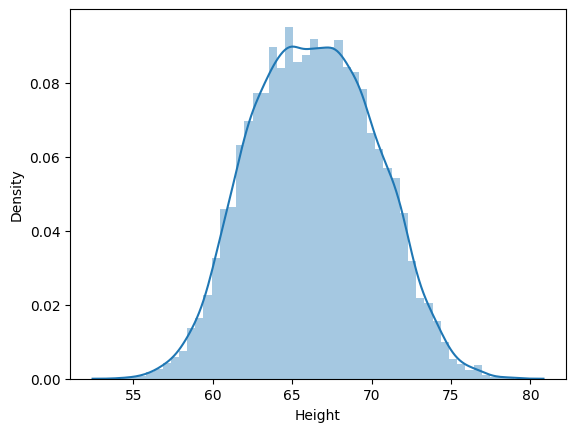

In [60]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

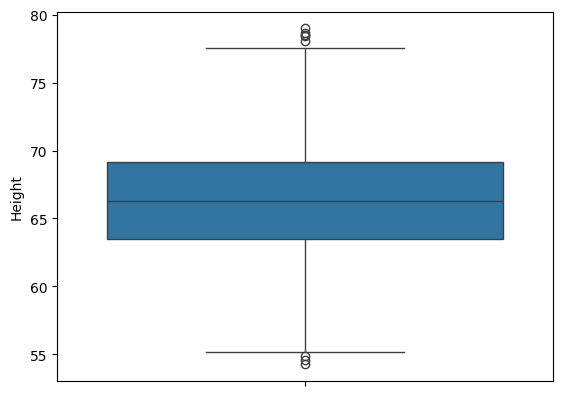

In [61]:
sns.boxplot(df.Height)

In [62]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)
upper_limit, lower_limit

(74.7857900583366, 58.13441158671655)

In [64]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [65]:
new_df['Height'].describe() , df['Height'].describe()

(count    9799.000000
 mean       66.363507
 std         3.644267
 min        58.134496
 25%        63.577147
 50%        66.317899
 75%        69.119859
 max        74.767447
 Name: Height, dtype: float64,
 count    10000.000000
 mean        66.367560
 std          3.847528
 min         54.263133
 25%         63.505620
 50%         66.318070
 75%         69.174262
 max         78.998742
 Name: Height, dtype: float64)

<ipython-input-66-edc1cb406df2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

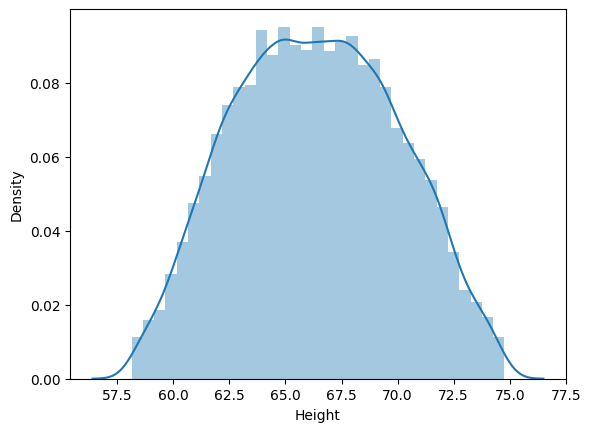

In [66]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

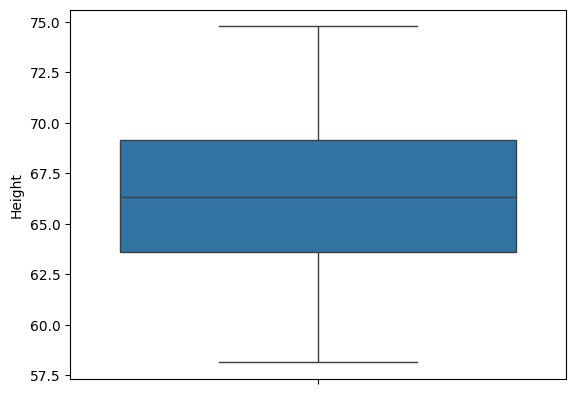

In [67]:
sns.boxplot(new_df['Height'])

In [ ]:
# capping -> Winsorization

In [69]:
df['Height'] = np.where(df['Height'] >= upper_limit, upper_limit,
         np.where(df['Height'] <= lower_limit, lower_limit, df['Height'])
         )

In [70]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [71]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<ipython-input-72-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

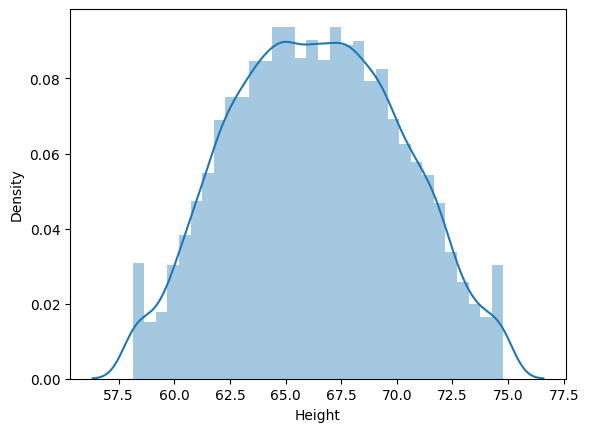

In [72]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

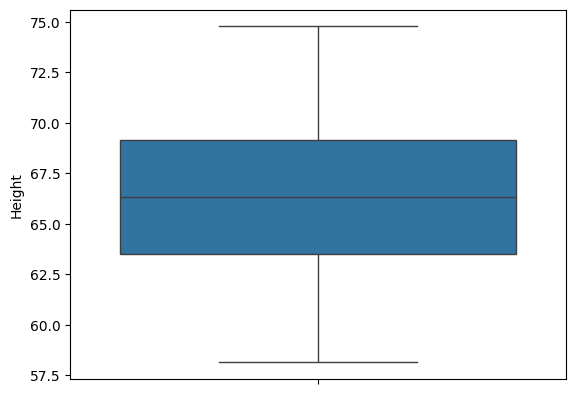

In [73]:
sns.boxplot(df['Height'])